<a href="https://colab.research.google.com/github/younghoonNa/PyTorch/blob/main/Pytorch/Pytorch_CNN(Convolutional_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network  (CNN)

- Convolution
- MNIST
- Pytorch visdom
- Pytorch Datasets & Custom Dataset
- CIFAR-10
- VGG & ResNet

## Convolution

- 이미지 위에서 stride 값 만큼 filter(kernel)을 이동시키면서 겹쳐지는 부분의 각 원소의 값을 곱해서 모두 더한 값을 출력으로 하는 연산

- stride : filter를 한번에 얼마나 이동시킬 것인가.
- padding : zero-padding 0으로 여백 채우기

### Conv2d
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1(default), padding=O, (dilation=1, groups=1) , bias = True)

![image.png]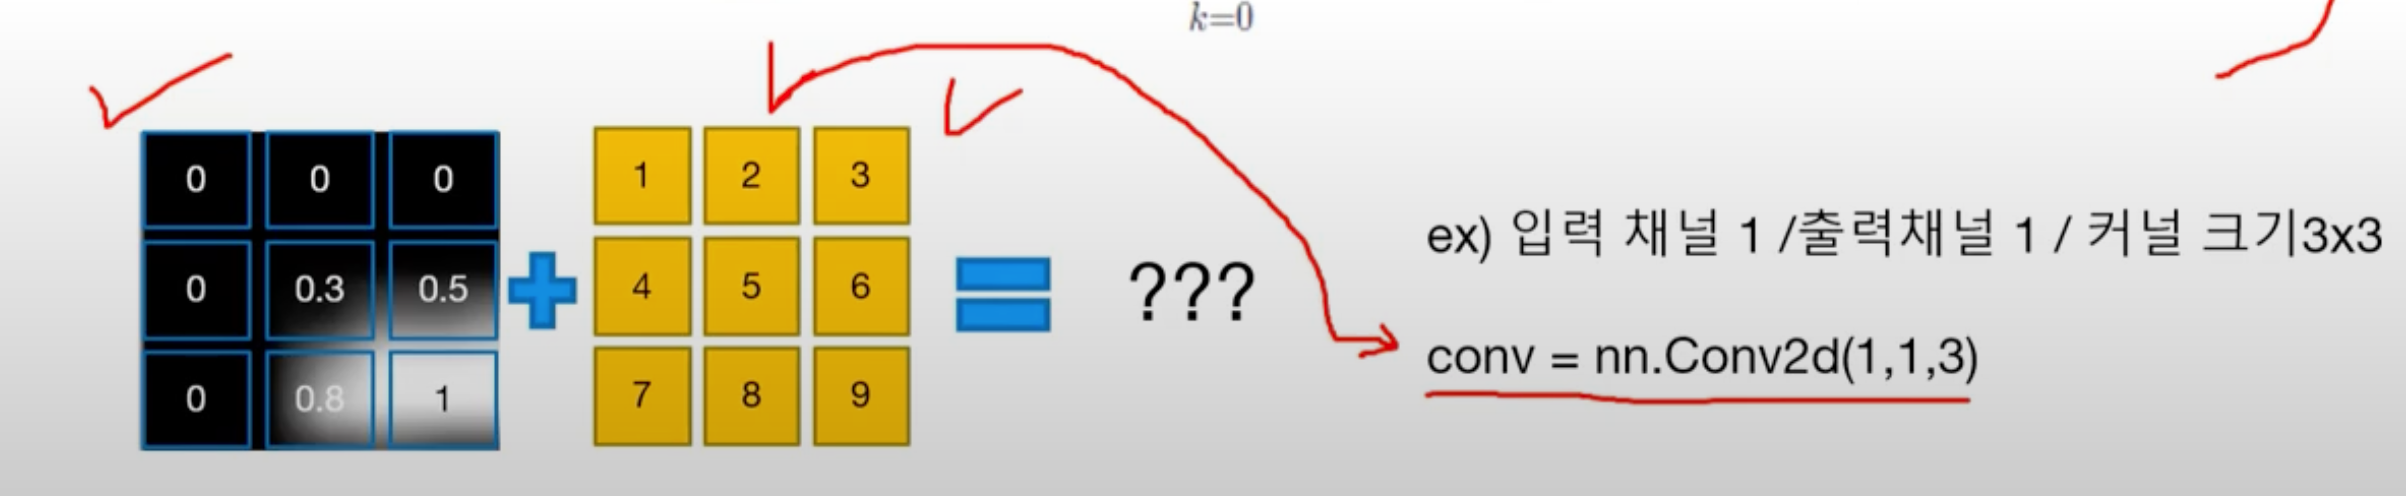

위의 그림과 같은 3 * 3 크기의 filter를 만드는 법 <br>
`conv = nn.Conv2d(1,1,3)` , (3*1)짜리 필터를 만드는 법 : Conv2d(1,1,(3,1))

- input type : torch.Tensor()
- input shape : (N * C * H * W)
  - (batch_size, channel, height, width)

### Convolution의 output 크기

### $ \quad Output Image size = \frac {input size - filter size + (2 * padding) } {stride} + 1$

- 나눠 떨어지지 않을 경우 올림을 진행.



In [ ]:
import torch
import torch.nn as nn

In [ ]:
filter1 = nn.Conv2d(1,1, 11, stride=4, padding=0)
print(filter1)

input1 = torch.Tensor(1, 1, 227, 227)
print(input1.shape)

out1 = filter1(input1)
print(out1.shape)

Conv2d(1, 1, kernel_size=(11, 11), stride=(4, 4))
torch.Size([1, 1, 227, 227])
torch.Size([1, 1, 55, 55])


In [ ]:
filter2 = nn.Conv2d(1,1,7, stride=3, padding=0)
print(filter2)

input2 = torch.Tensor(1,1,64,64)
print(input2.shape)

out2 = filter2(input2)
print(out2.shape)


Conv2d(1, 1, kernel_size=(7, 7), stride=(3, 3))
torch.Size([1, 1, 64, 64])
torch.Size([1, 1, 20, 20])


In [ ]:
filter3 = nn.Conv2d(1,1,5, stride=1, padding=2)
print(filter3)

input3 = torch.Tensor(1,1,32,32)
print(input3.shape)

out3 = filter3(input3)
print(out3.shape)

Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
torch.Size([1, 1, 32, 32])
torch.Size([1, 1, 32, 32])


In [ ]:
filter4 = nn.Conv2d(1,1,5, stride=1, padding=0)
print(filter4)

input4 = torch.Tensor(1,1,32,64)
print(input4.shape)

out4 = filter4(input4)
print(out4.shape)

Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1))
torch.Size([1, 1, 32, 64])
torch.Size([1, 1, 28, 60])


In [ ]:
filter5 = nn.Conv2d(1,1,3, stride=1, padding=1)
print(filter5)

input5 = torch.Tensor(1,1,64,32)
print(input5.shape)

out5 = filter5(input5)
print(out5.shape)

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([1, 1, 64, 32])
torch.Size([1, 1, 64, 32])


## Neuron 과 Convolution

- filter의 각각의 값이 노란색으로 퍼셉트론으로 들어가고, Convolution filter를 통해 나온 값이 초록색으로 퍼셉트론에 들어가게 된다. 여기서 연산을 진행한 후 값이 나오게 되고, 결과는 `8 + bias`가 나오는 것을 알 수 있다.

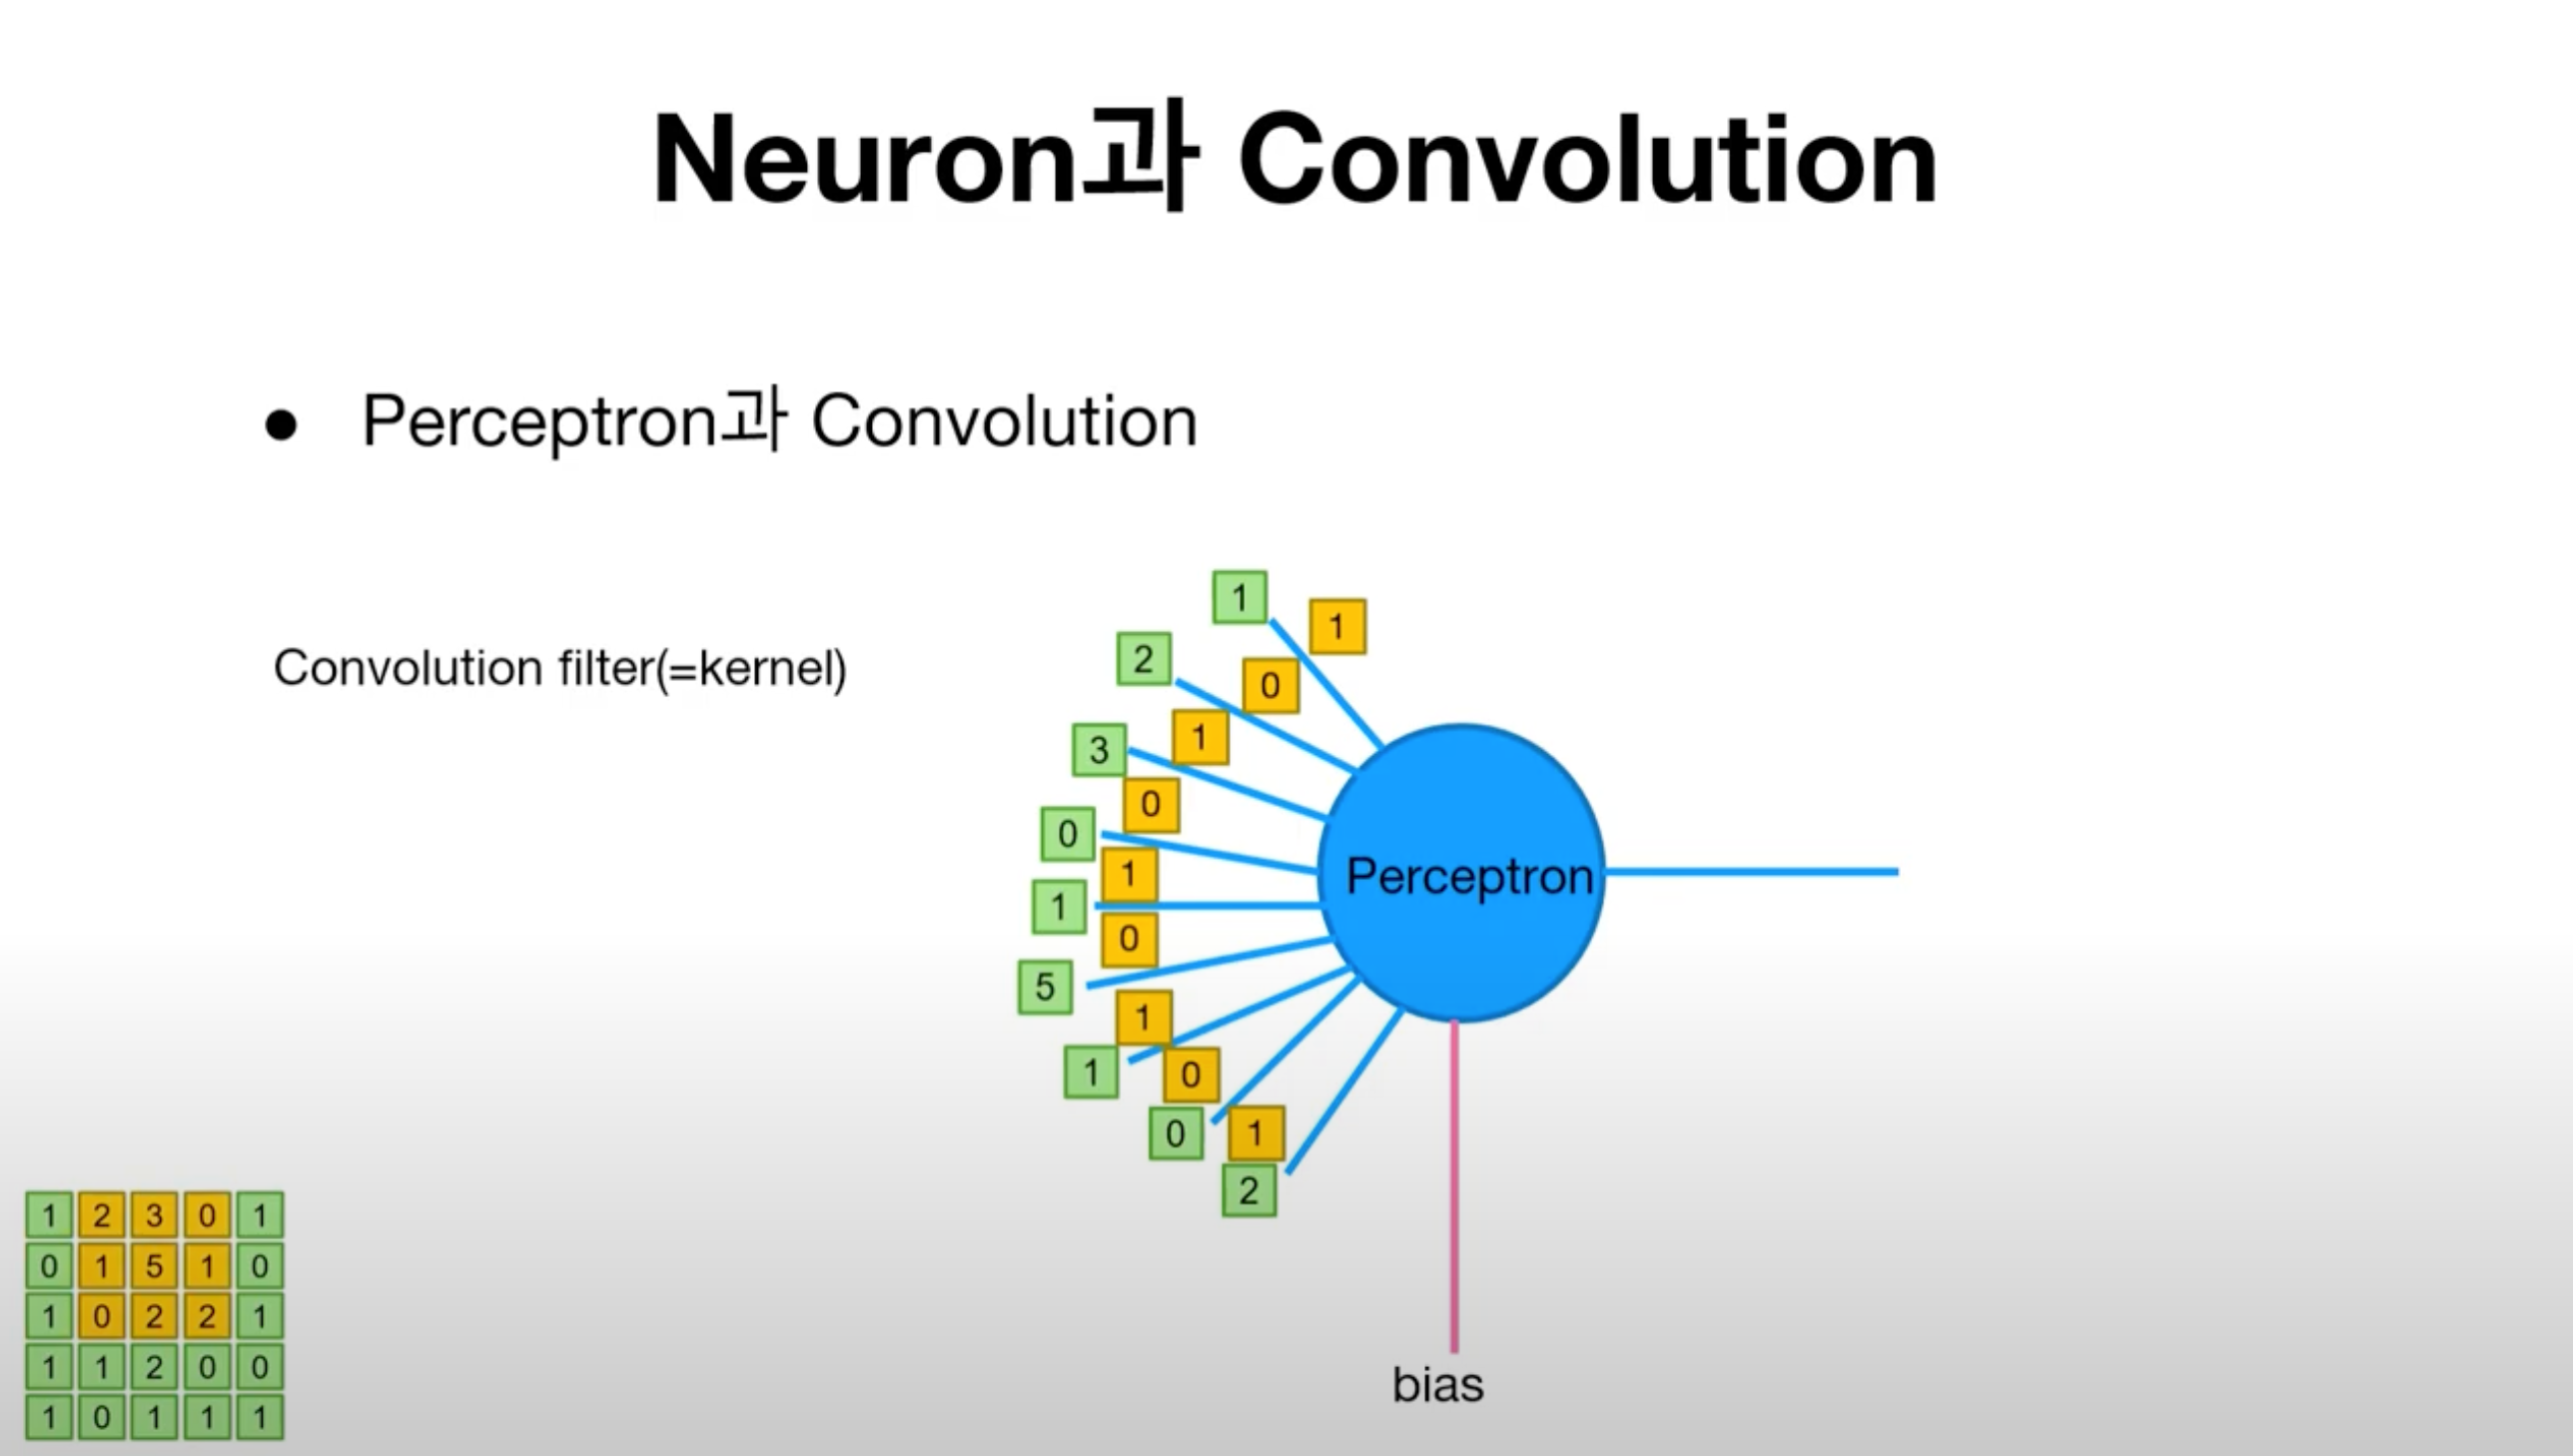

## Poolling 

- 이미지의 크기를 줄이기 위해
- Fully Connected 를 대신하기 위해

### MaxPool2d 

torch.nn.MaxPool2d(`kernel_size`, stride = None , padding=0, dilation=1, return_indices = False , ceil_mode=False)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
inputs = torch.Tensor(1,1,28,28)
conv1 = nn.Conv2d(1,5,5)
pool = nn.MaxPool2d(2)
out = conv1(inputs)
out2 = pool(out)
print(out.shape)
print(out2.shape)

torch.Size([1, 5, 24, 24])
torch.Size([1, 5, 12, 12])


# MNIST CNN

In [ ]:
import torch
import torch.nn as nn

In [ ]:
inputs = torch.Tensor(1,1,28,28)
print(inputs.shape)

torch.Size([1, 1, 28, 28])


In [ ]:
conv1 = nn.Conv2d(1,32,3, padding=1)
pool = nn.MaxPool2d(2)

conv2 = nn.Conv2d(32,64,3, padding=1)

out = conv1(inputs)
print(out.shape)

out = pool(out)
print(out.shape)

out = conv2(out)
print(out.shape)

out = pool(out)
print(out.shape)


torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 14, 14])
torch.Size([1, 64, 14, 14])
torch.Size([1, 64, 7, 7])


In [ ]:
print(out.size(0))
print(out.size(1))
print(out.size(2))
print(out.size(3))

1
64
7
7


In [ ]:
out = out.view(out.size(0), -1)
print(out.shape)

fc = nn.Linear(3136, 10)
out = fc(out)
out.shape

torch.Size([1, 3136])


torch.Size([1, 10])

# CNN & MNIST

In [ ]:
 import torch
 import torch.nn as nn
 import torchvision.datasets as dsets
 import torchvision.transforms as transforms

 import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed_all(42)

In [ ]:
print(device)
torch.cuda.is_available()

cuda


True

In [ ]:
#parameters()
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
#MNIST dataset

mnist_train = dsets.MNIST(root = './', train=True, transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='./', train = False, transform= transforms.ToTensor(),
                        download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          drop_last = True)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1,32,kernel_size=3, stride =1, padding =1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, stride =1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
    )

    self.layer3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, stride =1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
    )
    

    # 3*3*128이 나오는 이유 -> output shape = inputshape(128) - kernel_size(2) + 2*padding(2) / stride(2)  + 1
    self.fc1 = nn.Linear(3*3*128, 625 , bias=True)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(625, 10 , bias=True)

    torch.nn.init.xavier_uniform_(self.fc1.weight)
    torch.nn.init.xavier_uniform_(self.fc2.weight)


  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)

    out = out.view(out.size(0), -1)
    # print(out.shape)
    out = self.fc1(out)
    out = self.relu(out)
    out = self.fc2(out)

    return out

In [ ]:
model = CNN().to(device)

value = (torch.Tensor(1,1,28,28)).to(device)
print( (model(value)).shape)

torch.Size([1, 1152])
torch.Size([1, 10])


In [ ]:
print(model)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1152, out_features=625, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=625, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
total_batch = len(data_loader)
print("Learning start --- \n")

for epoch in range (training_epochs):
  avg_cost = 0

  for X, Y in data_loader:
    #Tensor 연산을 하려면 to(device) 가 있어야 함.
    X = X.to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print("Epoch : {} \t  Cost : {}".format(epoch+1, avg_cost))
print("Learning Fin")

Learning start --- 

Epoch : 1 	  Cost : 0.18467408418655396
Epoch : 2 	  Cost : 0.04403574392199516
Epoch : 3 	  Cost : 0.02980215661227703
Epoch : 4 	  Cost : 0.023940498009324074
Epoch : 5 	  Cost : 0.017243066802620888
Epoch : 6 	  Cost : 0.01488684955984354
Epoch : 7 	  Cost : 0.012434413656592369
Epoch : 8 	  Cost : 0.011545981280505657
Epoch : 9 	  Cost : 0.011097358539700508
Epoch : 10 	  Cost : 0.009159743785858154
Epoch : 11 	  Cost : 0.006545640528202057
Epoch : 12 	  Cost : 0.0068741971626877785
Epoch : 13 	  Cost : 0.005178868304938078
Epoch : 14 	  Cost : 0.005496755242347717
Epoch : 15 	  Cost : 0.0057201380841434
Learning Fin


In [ ]:
with torch.no_grad(): #학습을 안할거라서 대충 이런 의미 test 데이터 평가 한다는 의미
  X_test = mnist_test.test_data.view(len(mnist_test), 1,28, 28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  acc = correct_prediction.float().mean()
  print("ACC : ", acc.item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


ACC :  0.9860999584197998


# Visdom 데이터 시각화

In [ ]:
!pip install visdom

     |████████████████████████████████| 676 kB 5.2 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=38668ea167c924489340070b4c0916d7a524cfcc87e2717264dd3ecfad60d595
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5709 sha256=c284d11a66cabd8277f9ef7e73f902b98fb3dd6203c7c3b882ea436589c698dd
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
Successfully built visdom torchfile


In [ ]:
!pip install tensorboardcolab
from tensorboardcolab import TensorBoardColab
tb = TensorBoardColab()

  Created wheel for tensorboardcolab: filename=tensorboardcolab-0.0.22-py3-none-any.whl size=3859 sha256=0f641f1fdfa14c21dae78ac980d913f5b52067f0628b54e8469273a8c6851480
  Stored in directory: /root/.cache/pip/wheels/69/4e/4a/1c6c267395cb10edded1050df12af165d3254cfce324e80941
Successfully built tensorboardcolab
Wait for 8 seconds...
TensorBoard link:
https://16ca-35-193-175-155.ngrok.io


In [ ]:
def train(model, train_loader, device, optimizer, log_interval, epoch, globaliter, tb):
  """
  Example training function for PyTorch recording to tensorboardcolab. 
  """

  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):

    globaliter += 1
    data, target = data.to(device), target.to(device)

    optimizer.zero_grad()
    predictions = model(data)

    loss = F.nll_loss(predictions, target)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

      # This is where I'm recording to Tensorboard
      tb.save_value('Train Loss', 'train_loss', self.globaliter, loss.item())

# 사진을 통한 나만의 딥러닝 모델 학습/